In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read and Check Data

In [202]:
df=pd.read_csv("datasetler/heart.csv")

In [204]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [208]:
df["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [210]:
df["RestingECG"].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [212]:
df["ExerciseAngina"].unique()

array(['N', 'Y'], dtype=object)

In [214]:
df["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [216]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [218]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [220]:
df.duplicated().sum()

0

# Visualize Data

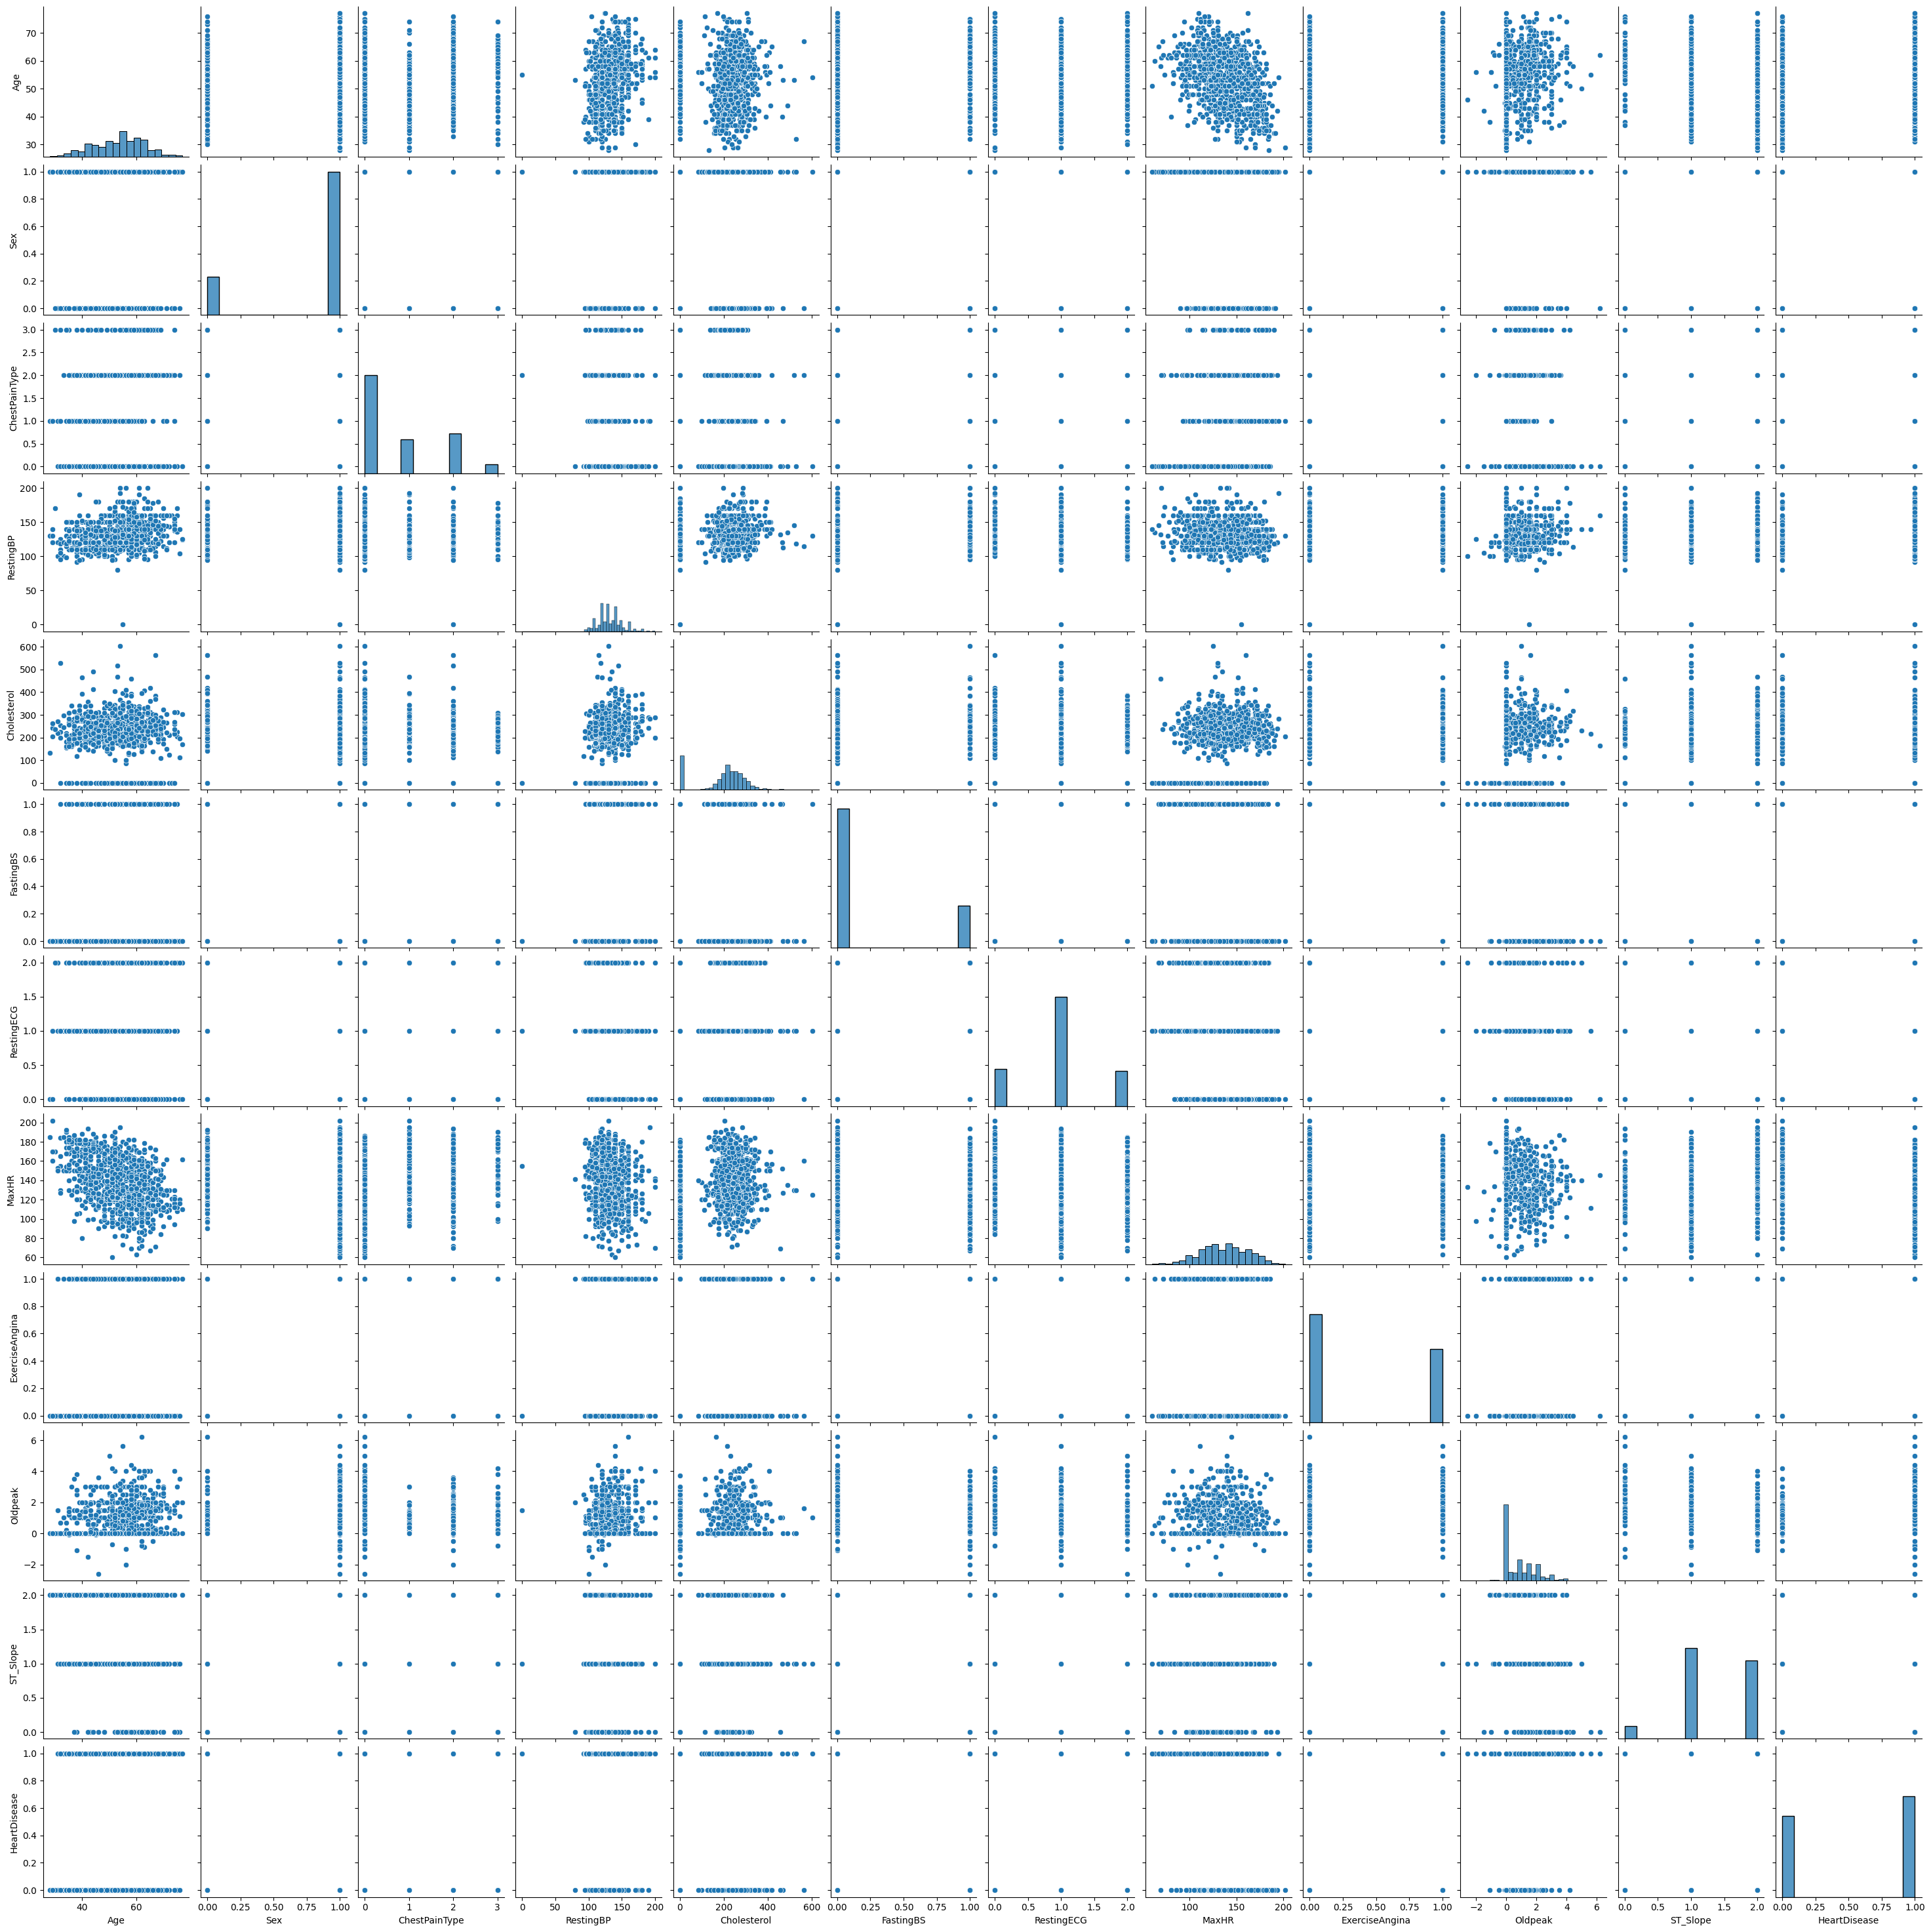

In [707]:
sns.pairplot(data=df);

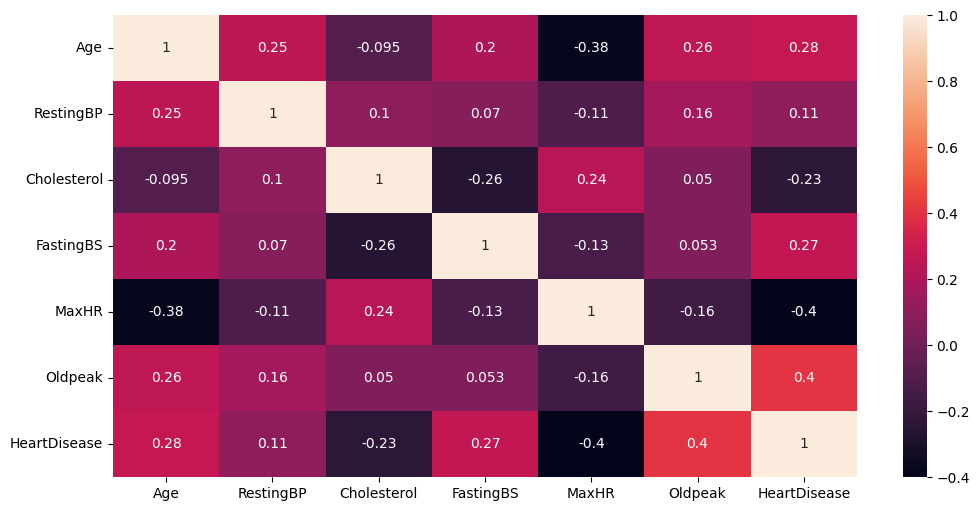

In [222]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True),annot=True);

In [224]:
renkler = sns.color_palette("pastel")

In [226]:
chest_pain=df['ChestPainType'].value_counts()
chest_pain

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

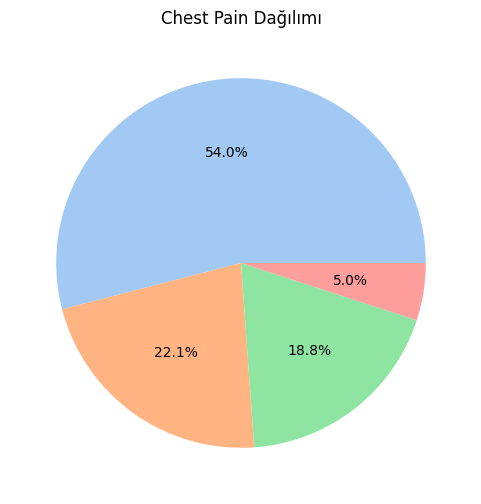

In [228]:
plt.figure(figsize=(6,6))
plt.pie(chest_pain,autopct="%1.1f%%",colors=renkler)
plt.title("Chest Pain Dağılımı");

In [230]:
resting_ECG=df["RestingECG"].value_counts()
resting_ECG

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

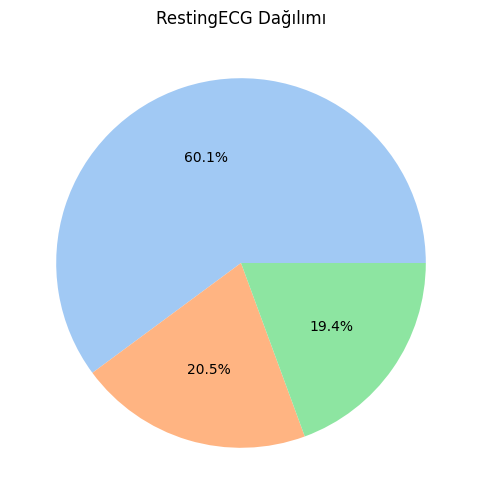

In [232]:
plt.figure(figsize=(6,6))
plt.pie(resting_ECG,autopct="%1.1f%%",colors=renkler)
plt.title("RestingECG Dağılımı");

''

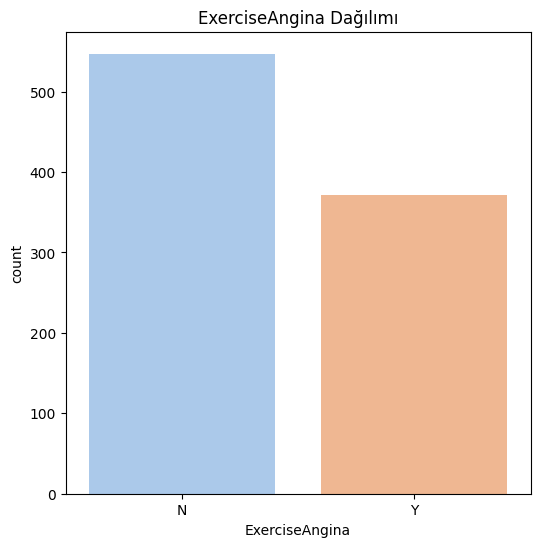

In [234]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x="ExerciseAngina",hue="ExerciseAngina",palette="pastel")
plt.title("ExerciseAngina Dağılımı")
;

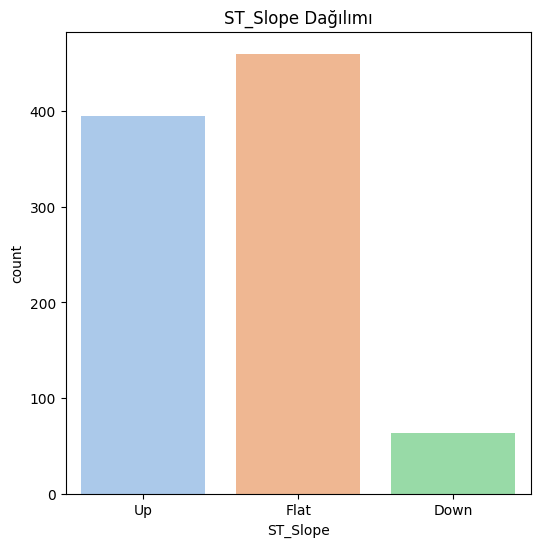

In [235]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x="ST_Slope",hue="ST_Slope",palette="pastel")
plt.title("ST_Slope Dağılımı");


In [237]:
heart_Disease=df["HeartDisease"].value_counts()
heart_Disease

HeartDisease
1    508
0    410
Name: count, dtype: int64

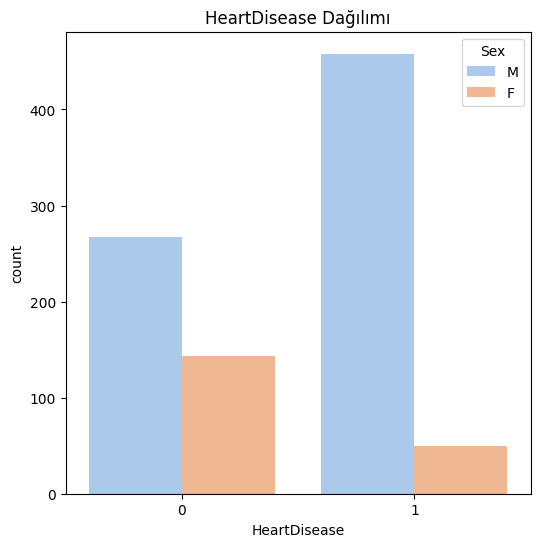

In [240]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x="HeartDisease",hue="Sex",palette="pastel")
plt.title("HeartDisease Dağılımı");

In [241]:
sex=df["Sex"].value_counts()
sex

Sex
M    725
F    193
Name: count, dtype: int64

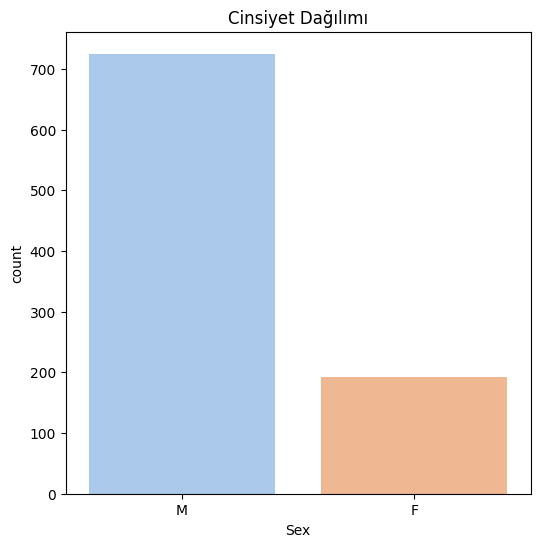

In [243]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x="Sex",hue="Sex",palette="pastel")
plt.title("Cinsiyet Dağılımı");

# Preprocessing Data

In [247]:
from sklearn.model_selection import train_test_split

In [249]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [251]:
le = LabelEncoder()
for column in df.select_dtypes(include=['object']):
    df[column] = le.fit_transform(df[column])

In [253]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [255]:
X=df.drop("HeartDisease",axis=1)

In [257]:
y=df["HeartDisease"]

In [259]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=28)

In [261]:
scaler=MinMaxScaler()

In [263]:
X_train=scaler.fit_transform(X_train)

In [265]:
X_test=scaler.transform(X_test)

In [267]:
X_train

array([[0.2244898 , 1.        , 0.        , ..., 0.        , 0.29545455,
        1.        ],
       [0.53061224, 1.        , 0.        , ..., 1.        , 0.63636364,
        0.5       ],
       [0.75510204, 1.        , 0.        , ..., 1.        , 0.42045455,
        0.5       ],
       ...,
       [0.59183673, 0.        , 0.        , ..., 1.        , 0.38636364,
        0.5       ],
       [0.75510204, 1.        , 0.        , ..., 1.        , 0.46590909,
        0.5       ],
       [0.16326531, 1.        , 0.66666667, ..., 0.        , 0.29545455,
        1.        ]])

In [269]:
X_test

array([[0.57142857, 1.        , 0.66666667, ..., 1.        , 0.40909091,
        1.        ],
       [0.79591837, 1.        , 1.        , ..., 0.        , 0.29545455,
        0.5       ],
       [0.59183673, 1.        , 0.        , ..., 0.        , 0.375     ,
        0.        ],
       ...,
       [0.26530612, 0.        , 0.33333333, ..., 0.        , 0.29545455,
        1.        ],
       [0.53061224, 1.        , 0.        , ..., 1.        , 0.40909091,
        0.5       ],
       [0.6122449 , 1.        , 0.        , ..., 0.        , 0.29545455,
        1.        ]])

#  Create Model

In [271]:
from sklearn.linear_model import LogisticRegression

In [273]:
model=LogisticRegression()

In [275]:
model.fit(X_train,y_train)

LogisticRegression()

In [277]:
pred=model.predict(X_test)

In [279]:
pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [281]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [283]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       121
           1       0.88      0.88      0.88       155

    accuracy                           0.87       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276



In [285]:
confusion_matrix(y_test,pred)

array([[102,  19],
       [ 18, 137]], dtype=int64)

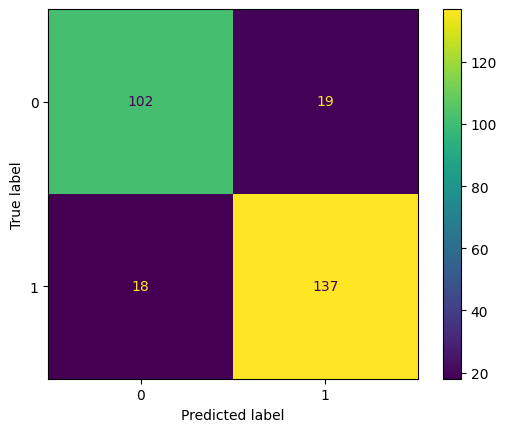

In [287]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [289]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


# Create GradiendBoost Model

In [293]:
from sklearn.ensemble import GradientBoostingClassifier

In [182]:
from sklearn.model_selection import GridSearchCV

In [318]:
model=GradientBoostingClassifier()

In [320]:
parameters={
    "n_estimators":[1,3,5,10,20,50,100,120],
    "max_depth":[2,3,4,5,6,7,8]




    
}

In [322]:
grid=GridSearchCV(model,parameters)

In [324]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [1, 3, 5, 10, 20, 50, 100, 120]})

In [325]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 20}

In [381]:
grid.best_score_

0.8784762596899224

In [383]:
model=GradientBoostingClassifier(n_estimators=50,max_depth=3)

In [385]:
model.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=50)

In [387]:
pred=model.predict(X_test)

In [389]:
confusion_matrix(y_test,pred)

array([[105,  16],
       [ 19, 136]], dtype=int64)

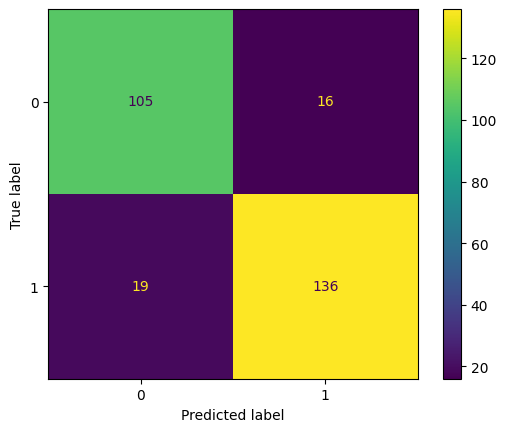

In [391]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [393]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       121
           1       0.89      0.88      0.89       155

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276

